In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
import brainstat as bs
import hippomaps as hm
from brainstat.stats.terms import FixedEffect
from brainstat.stats.SLM import SLM
import brainspace
import pingouin as pg
import statsmodels.api as sm
import seaborn as sb
import statistics
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import pearsonr

/var/folders/1h/4rrbjwpd065fz7y71cbl576r0000gn/T/ipykernel_81658/4270176772.py:21: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


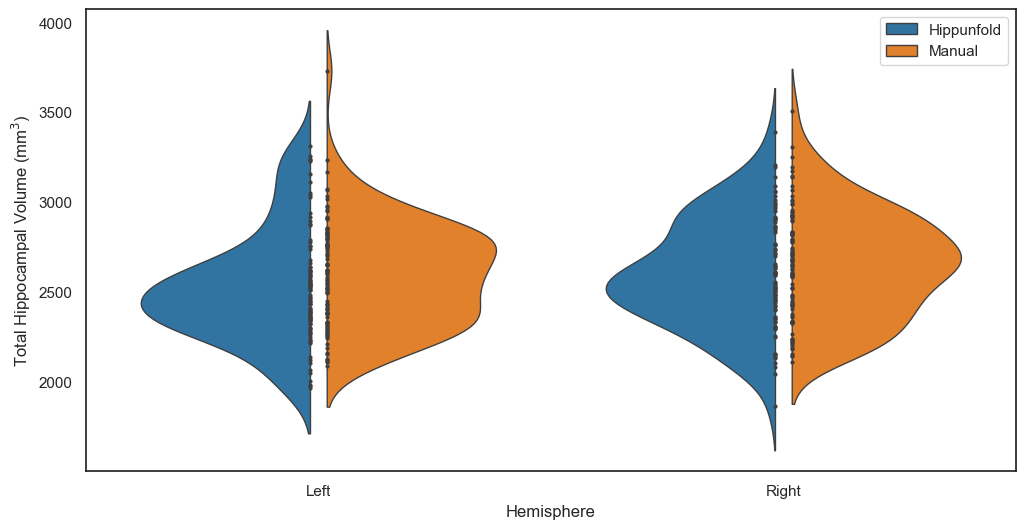

In [ ]:
plt.rcParams["font.family"] = "Helvetica"

sns.set(style="white")

# Load the dataset
file_path = "/Users/nimatalaeikamalabadi/Project1/Final_data/Hippunfold_vs_Manual_Totalvol_R_L.csv"
df = pd.read_csv(file_path)

# Convert the dataset to long format for seaborn
df_long = df.melt(var_name="Method", value_name="Total Volume")

df_long["Hemisphere"] = df_long["Method"].apply(lambda x: "Left" if "L" in x else "Right")
df_long["Method Type"] = df_long["Method"].apply(lambda x: "Hippunfold" if "Hippunfold" in x else "Manual")

# Create the figure
plt.figure(figsize=(12, 6))

# Violin plot
sns.violinplot(
    data=df_long, 
    x="Hemisphere", 
    y="Total Volume", 
    hue="Method Type", 
    split=True, 
    linewidth=1, 
    scale="width", 
    gap=0.09, 
    inner="point",
    palette=["#1f77b4", "#ff7f0e"],
    order=["Left", "Right"]  # Forces "Right" to appear first and "Left" second
)

# Customize legend
plt.legend(loc="upper right")

# Set labels and title
plt.ylabel("Total Hippocampal Volume (mm$^3$)")

# Show the plot
plt.show()

/var/folders/1h/4rrbjwpd065fz7y71cbl576r0000gn/T/ipykernel_81658/148984677.py:30: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


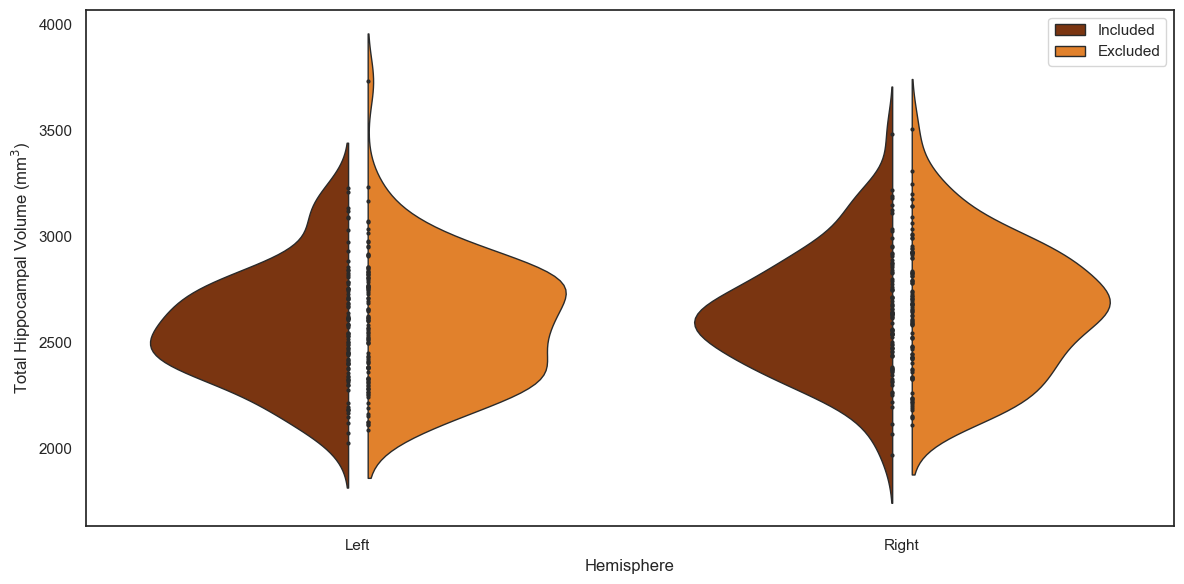

In [10]:
# Optional: set font globally
plt.rcParams["font.family"] = "Helvetica"

sns.set(style="white")

# Add group labels
included_df_labeled = included_df.copy()
included_df_labeled["Group"] = "Included"

refined_excluded_df_labeled = refined_excluded_df.copy()
refined_excluded_df_labeled["Group"] = "Excluded"

# Combine the dataframes
combined_df = pd.concat([included_df_labeled, refined_excluded_df_labeled])

# Reshape for seaborn
df_long = pd.melt(
    combined_df,
    id_vars=["Group"],
    value_vars=["Left Total Hippocampal Volume", "Right Total Hippocampal Volume"],
    var_name="Hemisphere",
    value_name="Total Volume"
)

# Clean labels for hemisphere
df_long["Hemisphere"] = df_long["Hemisphere"].str.replace(" Total Hippocampal Volume", "")

# Create the plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_long,
    x="Hemisphere",
    y="Total Volume",
    hue="Group",
    split=True,
    linewidth=1,
    scale="width",
    gap=0.09,
    inner="point",
    palette=["#8b2f00", "#ff7f0e"],
    order=["Left", "Right"]
    
)

# Customize appearance
plt.legend(loc="upper right")
plt.ylabel("Total Hippocampal Volume (mm$^3$)")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# --- Load volume data (already limited to subjects with segmentations) ---
df = pd.read_csv("/Users/nimatalaeikamalabadi/Project1/Final_data/Manual_217_total_and_anterior.csv")

# --- Define Included participants ---
included_ids = [
    1, 2, 3, 8, 12, 14, 15, 16, 21, 23, 28, 29, 30, 32, 33, 36, 37, 40, 49, 52,
    54, 56, 59, 60, 61, 64, 67, 69, 70, 72, 73, 75, 77, 79, 80, 82, 87, 88, 90,
    91, 92, 95, 97, 99, 104, 106, 107, 112, 115, 118, 123, 125, 126, 127, 130,
    132, 134, 135, 136, 138, 141, 144, 145, 146, 149, 153, 161, 162, 168, 169,
    170, 171, 173, 174, 176, 180, 181, 182, 187, 189, 191, 192, 195, 201, 202,
    203, 204, 210, 211, 212, 213, 214, 216
]

# --- Group assignment ---
included_df = df[df["Participant Number"].isin(included_ids)]
excluded_df = df[~df["Participant Number"].isin(included_ids)]

print(f"Included n = {len(included_df)}")
print(f"Excluded n = {len(excluded_df)}")

# --- Run Welch t-tests ---
measures = ["Left Total Hippocampal Volume", "Right Total Hippocampal Volume"]
results = []

for m in measures:
    x = included_df[m].astype(float).dropna()
    y = excluded_df[m].astype(float).dropna()
    t_stat, p_val = ttest_ind(x, y, equal_var=False)

    results.append({
        "Measure": m,
        "n_included": len(x), "mean_included": x.mean(), "sd_included": x.std(ddof=1),
        "n_excluded": len(y), "mean_excluded": y.mean(), "sd_excluded": y.std(ddof=1),
        "t_stat": t_stat, "p_value": p_val
    })

# --- Display results ---
results_df = pd.DataFrame(results)
print(results_df.round({
    "mean_included": 2, "sd_included": 2,
    "mean_excluded": 2, "sd_excluded": 2,
    "t_stat": 3, "p_value": 4
}).to_string(index=False))

Included n = 93
Excluded n = 108
                       Measure  n_included  mean_included  sd_included  n_excluded  mean_excluded  sd_excluded  t_stat  p_value
 Left Total Hippocampal Volume          93        2567.63       262.28         108        2595.34       288.09  -0.713   0.4764
Right Total Hippocampal Volume          93        2631.40       276.69         108        2649.98       297.53  -0.458   0.6471


In [ ]:
# Load the datasets
file1_path = "/Users/nimatalaeikamalabadi/Project1/Final_data/comp_sub_L_synthseg_93.csv"
file2_path = "/Users/nimatalaeikamalabadi/Project1/Final_data/comp_sub_L_synthseg_108.csv"


df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Columns of interest
columns_to_test = ["InternalTotal", "Scene", "ExternalTotal", "Future", "Navigation"]

# Run independent t-tests
t_test_results = {}
for col in columns_to_test:
    if col in df1.columns and col in df2.columns:
        t_stat, p_value = ttest_ind(df1[col].dropna(), df2[col].dropna(), equal_var=False)  # Welch’s t-test
        t_test_results[col] = {"t-statistic": t_stat, "p-value": p_value}

# Print results
for col, result in t_test_results.items():
    print(f"{col}: t-statistic = {result['t-statistic']:.4f}, p-value = {result['p-value']:.4f}")

InternalTotal: t-statistic = 0.5213, p-value = 0.6028
Scene: t-statistic = 1.9472, p-value = 0.0529
ExternalTotal: t-statistic = 0.6173, p-value = 0.5377
Future: t-statistic = 1.5035, p-value = 0.1343
Navigation: t-statistic = -0.2267, p-value = 0.8209
